# 🔎 Analyse en Composantes Principales (ACP)

Dans cette partie, nous appliquons la méthode **d’Analyse en Composantes Principales (ACP)** sur le dataset des voitures.  
L’objectif est de **réduire la dimensionnalité** des données tout en conservant l’essentiel de l’information.

### Étapes de l’analyse :

1. **Standardisation des données**  
   - Les variables sont centrées et réduites afin d’être comparables entre elles.  

2. **Calcul des composantes principales**  
   - Nous extrayons les nouveaux axes (composantes) et mesurons la **variance expliquée** par chacun.  

3. **Visualisations et interprétation**
   - ✅ *Matrice des nuages de points* : exploration des relations entre variables.  
   - ✅ *Projection des individus (plan factoriel)* : regroupement des observations (voitures).  
   - ✅ *Cercle des corrélations* : contribution des variables aux axes principaux.  
   - ✅ *Histogrammes* : distribution de chaque variable pour une meilleure compréhension des données.  

### Conclusion
L’ACP permet ici d’**identifier les variables les plus influentes** et de **simplifier l’interprétation visuelle** du dataset automobile.  
C’est une étape clé pour mieux comprendre la structure globale des données avant d’aller plus loin dans l’analyse.  


Dimension du dataset : (60, 7)
Nombre d'observations : 60
Nombre de variables : 7
✅ Données centrées et réduites (aperçu) :
[[-0.74851382 -0.69830945 -0.63537109 -0.44693177  0.21374321]
 [-0.58014252 -0.61572357 -0.5933708  -0.1476471   0.03685228]
 [-0.67762064 -0.7533667  -0.71937168 -0.29728944  0.34641142]
 [-0.91688513 -0.91853844 -1.05537402 -0.74621644  0.74441602]
 [-0.60672746 -0.58819495 -0.69137148 -0.1476471   0.12529775]]

Coordonnées principales (ACP) :
                         0         1         2         3         4
Car Name                                                         
Toyota Corolla   1.214893 -0.230115 -0.071652 -0.292319 -0.278457
Honda Civic      0.871352 -0.390662 -0.027864 -0.370962 -0.201660
Hyundai Elantra  1.243503 -0.350743  0.020040 -0.268839 -0.103019
Kia Rio          1.942954 -0.280097  0.101719 -0.054566 -0.205790
Mazda 3          0.951775 -0.456524 -0.011539 -0.283967 -0.185812

Variance expliquée par chaque axe :
    Valeurs Propres  Inerti

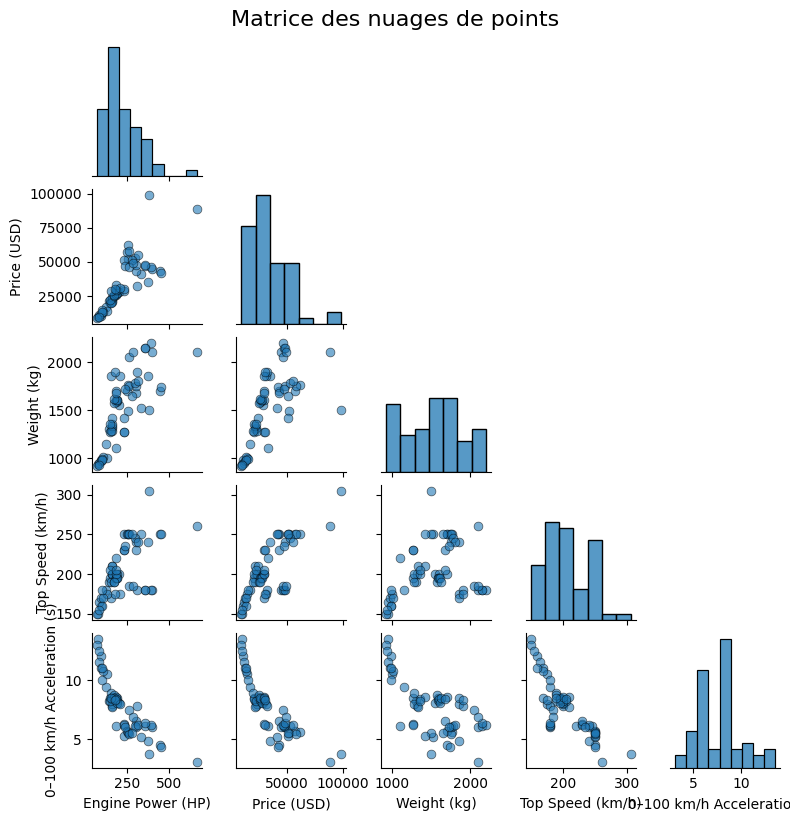

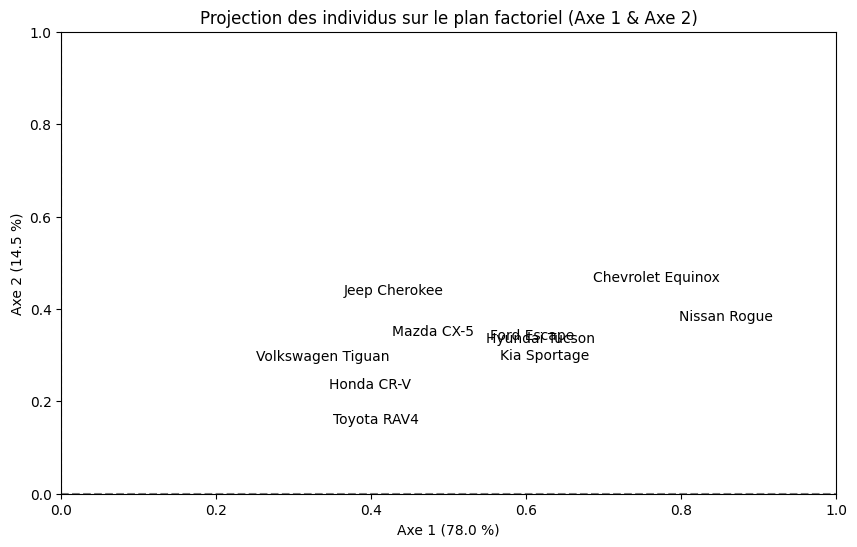

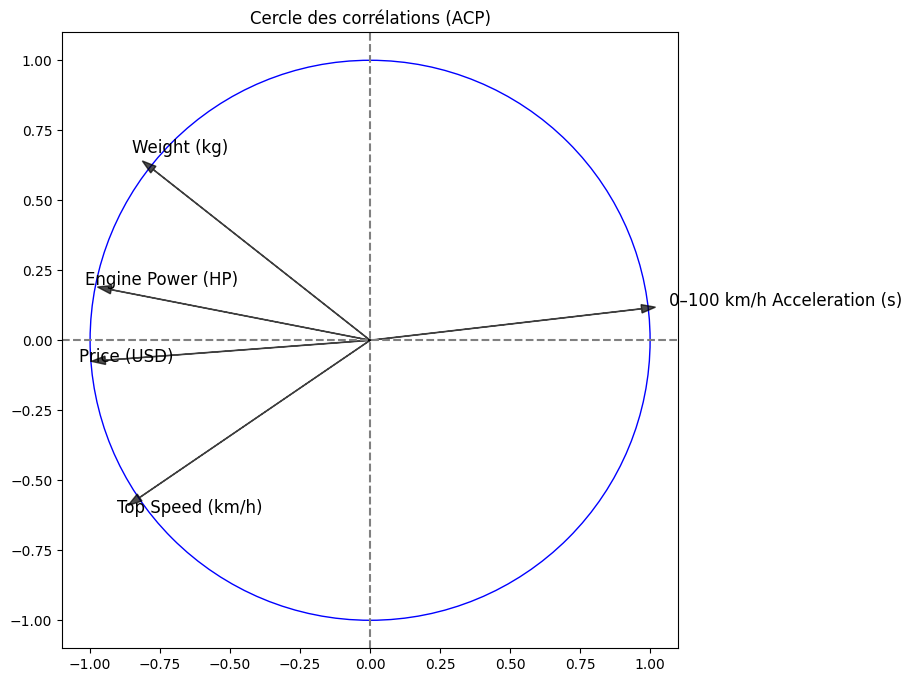

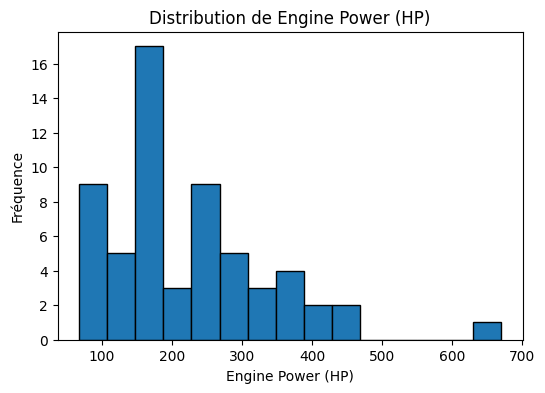


--------------------------------------------------



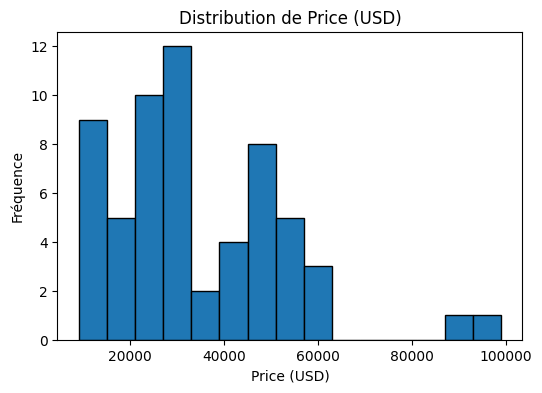


--------------------------------------------------



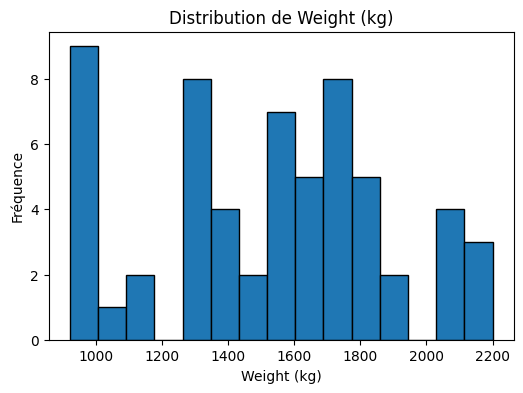


--------------------------------------------------



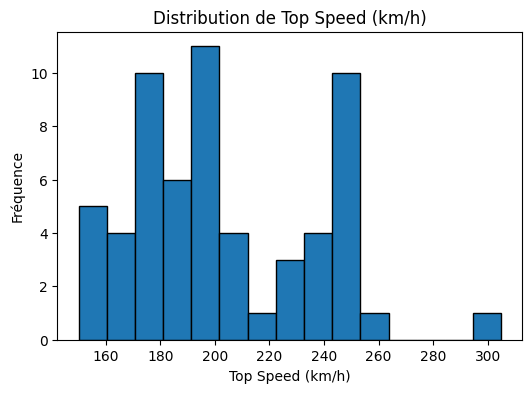


--------------------------------------------------



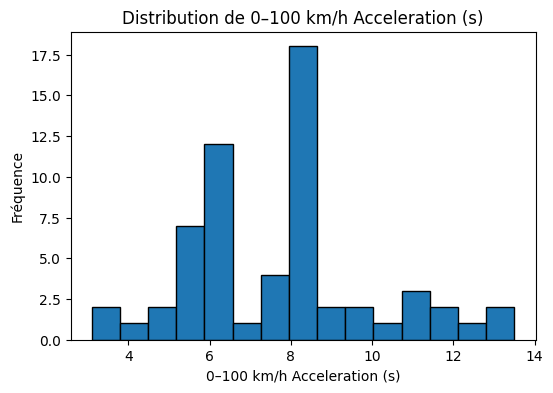


--------------------------------------------------



In [20]:
# ==============================
# 📌 1. Importation des librairies
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# ==============================
# 📌 2. Chargement et exploration des données
# ==============================
X = pd.read_excel("/content/cars_data1.xlsx", sheet_name='Sheet1', header=0, index_col=0)

print("Dimension du dataset :", X.shape)
print("Nombre d'observations :", X.shape[0])
print("Nombre de variables :", X.shape[1])

# Sélection des variables quantitatives
Y = X[[
    "Engine Power (HP)",
    "Price (USD)",
    "Weight (kg)",
    "Top Speed (km/h)",
    "0–100 km/h Acceleration (s)"
]]


# ==============================
# 📌 3. Standardisation des données
# ==============================
scaler = StandardScaler()
Z = scaler.fit_transform(Y)

print("✅ Données centrées et réduites (aperçu) :")
print(Z[:5])  # afficher seulement les 5 premières lignes


# ==============================
# 📌 4. Analyse en Composantes Principales (ACP)
# ==============================
acp = PCA()
coord = acp.fit_transform(Z)

# Coordonnées sous forme de DataFrame
coord_df = pd.DataFrame(coord, index=X.index)
print("\nCoordonnées principales (ACP) :\n", coord_df.head())

# Variances expliquées
eigval = acp.explained_variance_
inertie = acp.explained_variance_ratio_
cuminertie = np.cumsum(inertie) * 100

print("\nVariance expliquée par chaque axe :\n",
      pd.DataFrame({"Valeurs Propres": eigval,
                    "Inertie (%)": inertie * 100,
                    "Inertie Cumulative (%)": cuminertie}))


# ==============================
# 📌 5. Visualisation : Matrice des nuages de points
# ==============================
df_numeric = X.select_dtypes(include=['float64', 'int64'])

sns.pairplot(df_numeric, corner=True,
             plot_kws={"alpha": 0.6, "s": 40, "edgecolor": "k"},
             height=1.6, aspect=1)

plt.suptitle("Matrice des nuages de points", y=1.02, fontsize=16)
plt.show()

# --- espace entre analyses ---
print("\n" + "="*40 + "\n")


# ==============================
# 📌 6. Projection des individus (plan factoriel)
# ==============================
plt.figure(figsize=(10, 6))
for i in range(X.shape[0]):
    plt.annotate(X.index[i], (coord[i, 0], coord[i, 1]))

plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.xlabel(f"Axe 1 ({inertie[0]*100:.1f} %)")
plt.ylabel(f"Axe 2 ({inertie[1]*100:.1f} %)")
plt.title("Projection des individus sur le plan factoriel (Axe 1 & Axe 2)")
plt.show()

# --- espace entre analyses ---
print("\n" + "="*40 + "\n")


# ==============================
# 📌 7. Cercle des corrélations
# ==============================
eigval = acp.explained_variance_
sqrt_eigval = np.sqrt(eigval)
p = Y.shape[1]

corvar1 = acp.components_[0, :] * sqrt_eigval[0]
corvar2 = acp.components_[1, :] * sqrt_eigval[1]

plt.figure(figsize=(8, 8))
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
plt.gca().add_artist(circle)

for j in range(p):
    plt.arrow(0, 0, corvar1[j], corvar2[j], color='black', alpha=0.7,
              head_width=0.03, head_length=0.05)
    plt.text(corvar1[j]*1.1, corvar2[j]*1.1, Y.columns[j], fontsize=12)

plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.title("Cercle des corrélations (ACP)")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# --- espace entre analyses ---
print("\n" + "="*40 + "\n")


# ==============================
# 📌 8. Histogrammes des variables (séparés avec espace)
# ==============================

variables = ["Engine Power (HP)", "Price (USD)", "Weight (kg)",
             "Top Speed (km/h)", "0–100 km/h Acceleration (s)"]

for var in variables:
    plt.figure(figsize=(6,4))   # taille de chaque graphique
    X[var].hist(bins=15, edgecolor="black")
    plt.title(f"Distribution de {var}")
    plt.xlabel(var)
    plt.ylabel("Fréquence")
    plt.grid(False)
    plt.show()
    print("\n" + "-"*50 + "\n")  # séparation claire entre graphiques




# 🔎 Analyse des Correspondances Multiples (ACM)

Dans cette partie, nous appliquons la méthode **d’Analyse des Correspondances Multiples (ACM)**.  
L’ACM est une extension de l’Analyse Factorielle des Correspondances (AFC) permettant d’analyser plusieurs **variables qualitatives** en même temps.  
Elle est particulièrement utile pour **mettre en évidence les liens entre modalités** et **regrouper les individus** selon leurs profils.



## Étapes de l’analyse :

1. **Encodage des variables qualitatives**  
   - Transformation des variables catégorielles en variables indicatrices (*one-hot encoding*).  

2. **Standardisation des données**  
   - Préparation du tableau pour rendre les modalités comparables entre elles.  

3. **Application de l’ACM**  
   - Extraction des **axes factoriels** et calcul des **valeurs propres**.  
   - Détermination de la part d’information (*inertie*) expliquée par chaque axe.  

4. **Visualisations**
   - ✅ *Cercle des corrélations* : contribution des modalités aux axes principaux.  
   - ✅ *Projection des individus (plan factoriel)* : répartition et regroupement selon leurs profils.  
   - ✅ *Tableaux de contribution et de qualité de représentation (cos²)* : importance des modalités et des individus dans l’analyse.  



## Conclusion
L’ACM permet de **réduire la dimensionnalité** des données qualitatives tout en révélant les **structures cachées**.  
Grâce à cette méthode, il devient possible de **visualiser les associations entre modalités** et de **regrouper les individus** de manière intuitive.



=== Résultats de l'ACM ===
                      Variable   corvar1   corvar2  Ctrvar1 (%)  Ctrvar2 (%)  \
4     Transmission Type_Manual -0.860287  0.524586    35.531095    14.314600   
3  Transmission Type_Automatic  0.860287 -0.524586    35.531095    14.314600   
2             Fuel Type_Petrol  0.559208  0.825440    15.013044    35.441872   
0             Fuel Type_Diesel -0.529394 -0.831024    13.454909    35.922987   
1           Fuel Type_Electric -0.098929 -0.010686     0.469857     0.005939   

   Cos² Axe1 (%)  Cos² Axe2 (%)  
4       1.233488       0.458651  
3       1.233488       0.458651  
2       0.521189       1.135586  
0       0.467097       1.151001  
1       0.016311       0.000190  

=== Variance expliquée par chaque axe ===
Axe 1: 40.96%
Axe 2: 37.81%
Axe 3: 21.23%
Axe 4: 0.00%
Axe 5: 0.00%


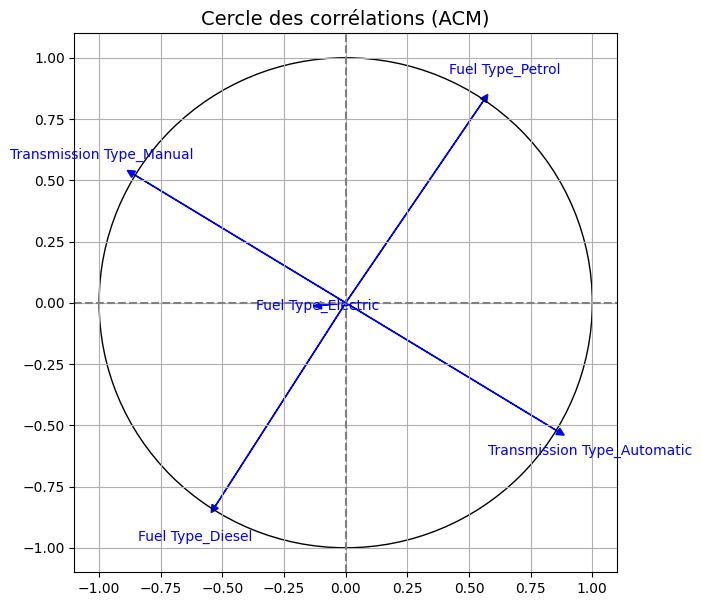

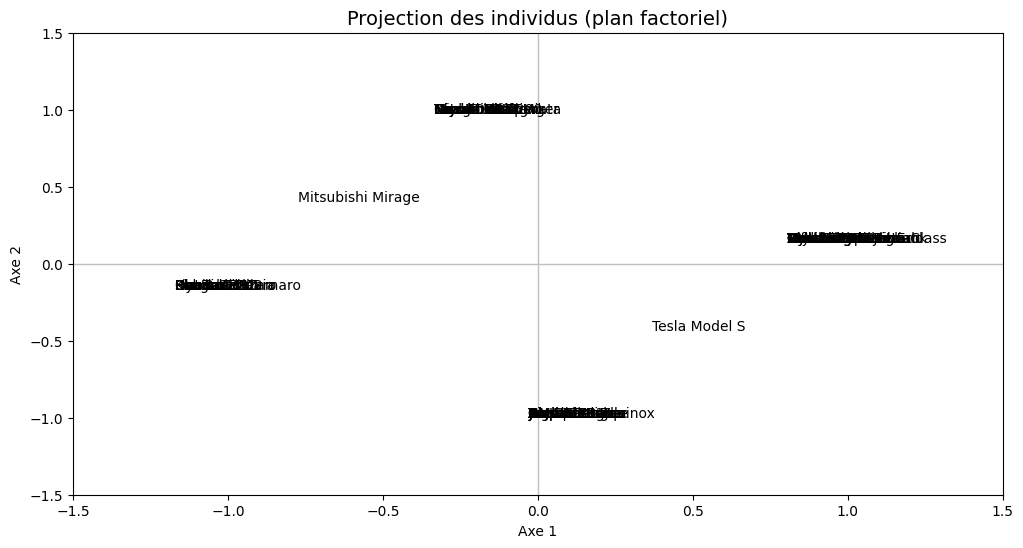

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ==============================
# 1. Chargement et préparation des données
# ==============================
df = pd.read_excel("/content/cars_data1.xlsx", sheet_name='Sheet1', header=0, index_col=0)

# Encodage one-hot des variables catégorielles (Fuel Type et Transmission Type)
df_encoded = pd.get_dummies(df[["Fuel Type", "Transmission Type"]], dtype=int)

# Centrage-réduction
X = StandardScaler().fit_transform(df_encoded)

# ==============================
# 2. ACM (Analyse des Correspondances Multiples)
# ==============================
acm = PCA()
X_acm = acm.fit_transform(X)
eigval = acm.explained_variance_
sqrt_eigval = np.sqrt(eigval)

# Corrélations entre variables et axes
corvar1 = acm.components_[0, :] * sqrt_eigval[0]
corvar2 = acm.components_[1, :] * sqrt_eigval[1]

# Contribution des variables (en %)
Ctrvar1 = (corvar1**2) / eigval[0] * 100
Ctrvar2 = (corvar2**2) / eigval[1] * 100

# Qualité de représentation (cos² en %)
Cos2var1 = (corvar1**2) / (np.sum(X**2, axis=0)) * 100
Cos2var2 = (corvar2**2) / (np.sum(X**2, axis=0)) * 100

# Ajustement des signes pour une meilleure lisibilité
corvar2 = -corvar2
X_acm[:, 1] = -X_acm[:, 1]

# Résumé
results = pd.DataFrame({
    'Variable': df_encoded.columns,
    'corvar1': corvar1,
    'corvar2': corvar2,
    'Ctrvar1 (%)': Ctrvar1,
    'Ctrvar2 (%)': Ctrvar2,
    'Cos² Axe1 (%)': Cos2var1,
    'Cos² Axe2 (%)': Cos2var2
}).sort_values(by='Ctrvar1 (%)', ascending=False)

print("\n=== Résultats de l'ACM ===")
print(results)

print("\n=== Variance expliquée par chaque axe ===")
for i, var in enumerate(acm.explained_variance_ratio_[:5], 1):
    print(f"Axe {i}: {var:.2%}")

# ==============================
# 3. Cercle des corrélations
# ==============================
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_title("Cercle des corrélations (ACM)", fontsize=14)

# Tracer les flèches pour chaque variable
for i in range(df_encoded.shape[1]):
    plt.arrow(0, 0, corvar1[i], corvar2[i],
              head_width=0.03, head_length=0.03, fc='blue', ec='blue')
    plt.text(corvar1[i]*1.15, corvar2[i]*1.15, df_encoded.columns[i],
             color='blue', ha='center', va='center', fontsize=10)

# Tracer les axes
ax.axhline(0, color='grey', linestyle='--')
ax.axvline(0, color='grey', linestyle='--')

# Cercle unité
cercle = plt.Circle((0, 0), 1, color='black', fill=False)
ax.add_artist(cercle)

plt.grid()
plt.show()

print("\n" + "="*40 + "\n")

# ==============================
# 4. Positionnement des individus (plan factoriel)
# ==============================
n = df_encoded.shape[0]

fig, axes = plt.subplots(figsize=(12, 6))
axes.set_xlim(-1.5, 1.5)
axes.set_ylim(-1.5, 1.5)

# Placement des étiquettes des observations
for i in range(n):
    plt.annotate(df.index[i], (coord[i, 0], coord[i, 1]))

# Ajouter les axes
plt.plot([-4, 4], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-4, 4], color='silver', linestyle='-', linewidth=1)
plt.xlabel("Axe 1")
plt.ylabel("Axe 2")
plt.title("Projection des individus (plan factoriel)", fontsize=14)
plt.show()


# 🔎 Analyse par K-Means et FCM (GMM)

Dans cette partie, nous effectuons une **classification non supervisée** afin de regrouper les voitures du dataset en **groupes homogènes**.

## Méthodes utilisées
1. **K-Means**  
   - Partitionne les observations en clusters.  
   - Chaque voiture est assignée à un **seul cluster** basé sur sa proximité avec le centre du cluster.

2. **FCM (Fuzzy C-Means)**  
   - Ici simulé avec un **modèle de mélange gaussien (GMM)**.  
   - Chaque voiture peut appartenir **partiellement à plusieurs clusters**, avec un degré d’appartenance probabiliste.

## Étapes de l’analyse
1. Prétraitement des données :  
   - Sélection des variables quantitatives.  
   - Centrage et réduction pour uniformiser les échelles.

2. Clustering :  
   - K-Means avec 5 clusters.  
   - FCM via GMM pour obtenir un clustering flou.

3. Visualisation et validation :  
   - Courbe du coude pour choisir le nombre optimal de clusters.  
   - Projection en 2D via ACP pour visualiser les clusters.  
   - Annotation des points avec le nom des voitures pour interprétation.

## Objectif
- Identifier des **groupes naturels** de voitures ayant des caractéristiques similaires.  
- Comparer une **classification stricte** (K-Means) et une **classification floue** (FCM/GMM).  
- Visualiser la structure latente du dataset pour mieux comprendre les tendances.


Comparaison des classifications K-Means et FCM :
                ID  KMeans  FCM
0   Toyota Corolla       2    2
1      Honda Civic       2    2
2  Hyundai Elantra       2    2
3          Kia Rio       1    1
4          Mazda 3       2    2


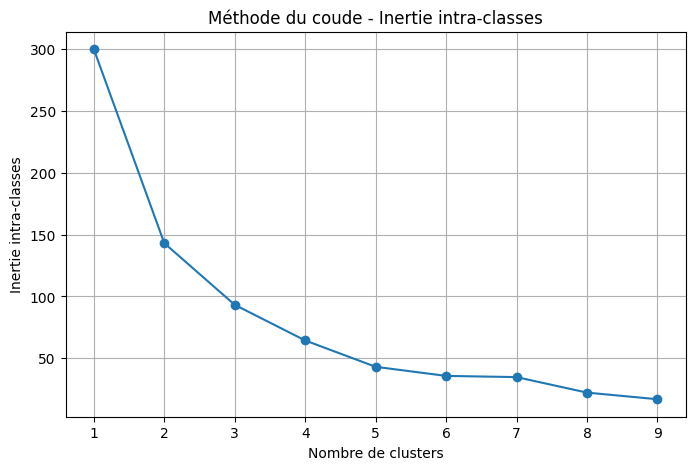

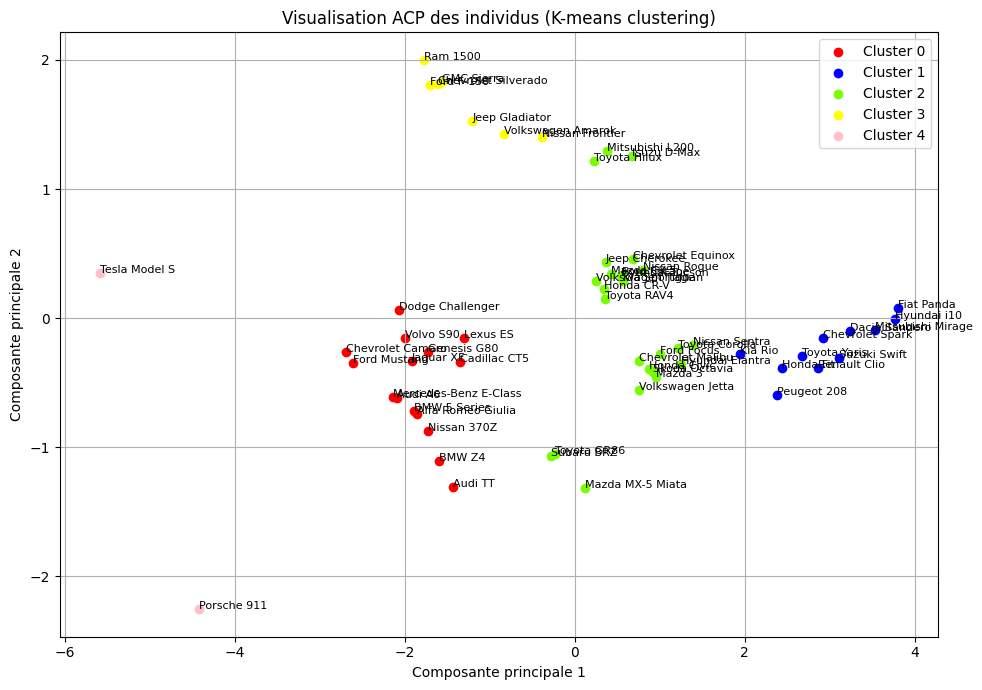

In [32]:
# =============================
#   K-MEANS & FCM (via GMM)
# =============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# 1. Charger la base de données
X = pd.read_excel("/content/cars_data1.xlsx", index_col=0)

# 2. Sélectionner uniquement les variables quantitatives
X_quant = X.select_dtypes(include=[np.number])

# 3. Centrage et réduction
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_quant)

# =============================
#   K-MEANS
# =============================
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Labels K-means
labels_kmeans = kmeans.labels_

# =============================
#   FCM (simulé avec GMM)
# =============================
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X_scaled)

labels_fcm = gmm.predict(X_scaled)  # étiquettes floues (choix max proba)

# =============================
#   Résultats comparatifs
# =============================
df_clusters = pd.DataFrame({
    'ID': X.index,
    'KMeans': labels_kmeans,
    'FCM': labels_fcm
})

print("Comparaison des classifications K-Means et FCM :")
print(df_clusters.head())

# =============================
#   Courbe du coude (inertie intra-classes)
# =============================
inertias = []
for i in range(1, 10):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertias, marker='o')
plt.title("Méthode du coude - Inertie intra-classes")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie intra-classes")
plt.grid(True)
plt.show()

# =============================
#   Visualisation ACP en 2D
# =============================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
colors = ['red', 'blue', 'lawngreen', 'yellow', 'pink']

for couleur, k in zip(colors, range(5)):
    plt.scatter(X_pca[labels_kmeans == k, 0],
                X_pca[labels_kmeans == k, 1],
                c=couleur, label=f'Cluster {k}')

# Annotation des points
for i in range(X.shape[0]):
    plt.annotate(X.index[i], (X_pca[i, 0], X_pca[i, 1]), fontsize=8)

plt.title("Visualisation ACP des individus (K-means clustering)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 🔎 Analyse par CAH et K-Means

Dans cette partie, nous effectuons une **classification non supervisée** pour regrouper les voitures en **groupes homogènes** selon leurs caractéristiques quantitatives.

## Méthodes utilisées
1. **CAH (Cluster Hiérarchique Ascendant)**  
   - Utilise la méthode de **Ward** pour regrouper les observations.  
   - Permet de visualiser la **hiérarchie des clusters** via un dendrogramme.  
   - Les clusters sont ensuite découpés en un nombre choisi d’unités (ici 5).

2. **K-Means**  
   - Partitionne les observations en **5 clusters**.  
   - Chaque voiture est assignée à un **cluster unique** basé sur la proximité avec le centre du cluster.

## Étapes de l’analyse
1. **Prétraitement des données** :  
   - Sélection des variables quantitatives.  
   - Centrage et réduction pour uniformiser les échelles.

2. **Clustering** :  
   - Application de **CAH** avec découpage en 5 clusters.  
   - Application de **K-Means** sur les mêmes données pour comparaison.

3. **Visualisation et validation** :  
   - **Dendrogramme** pour observer la hiérarchie des clusters (CAH).  
   - **Projection en 2D via ACP** pour visualiser les clusters.  
   - **Comparaison des clusters** CAH vs K-Means avec :  
     - Indice de Rand ajusté (ARI)  
     - Matrice de confusion  
   - Annotation des points avec le nom des voitures pour interprétation.

## Objectif
- Identifier des **groupes naturels** de voitures ayant des caractéristiques similaires.  
- Comparer **CAH** (hiérarchie) et **K-Means** (partition stricte).  
- Visualiser la structure latente du dataset pour mieux comprendre les tendances.



Moyennes par cluster (CAH) :
             Engine Power (HP)   Price (USD)  Weight (kg)  Top Speed (km/h)  \
Cluster_CAH                                                                   
1                   336.857143  44714.285714  2092.857143        181.428571   
2                   524.500000  94000.000000  1800.000000        283.000000   
3                   306.000000  49200.000000  1687.333333        245.333333   
4                    94.181818  12136.363636   983.636364        165.000000   
5                   175.000000  25940.000000  1489.400000        198.600000   

             0–100 km/h Acceleration (s)  
Cluster_CAH                               
1                               6.700000  
2                               3.400000  
3                               5.506667  
4                              11.381818  
5                               8.060000  


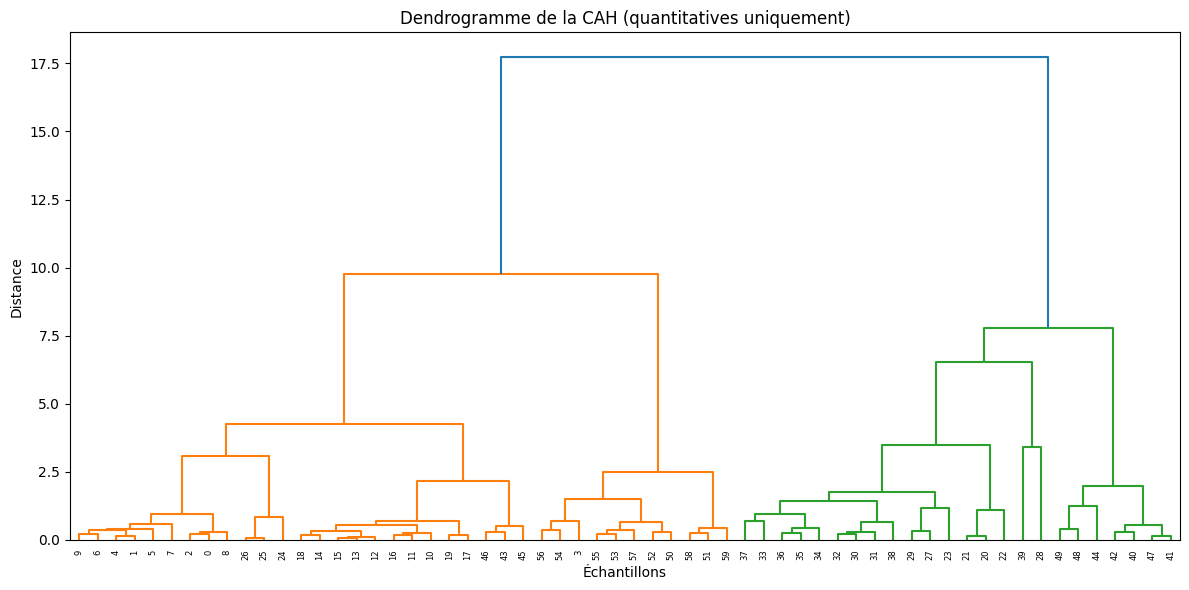


Indice de Rand ajusté (ARI) : 1.0
Matrice de confusion :
[[ 0  0  0  7  0]
 [ 0  0  0  0  2]
 [15  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0 25  0  0]]


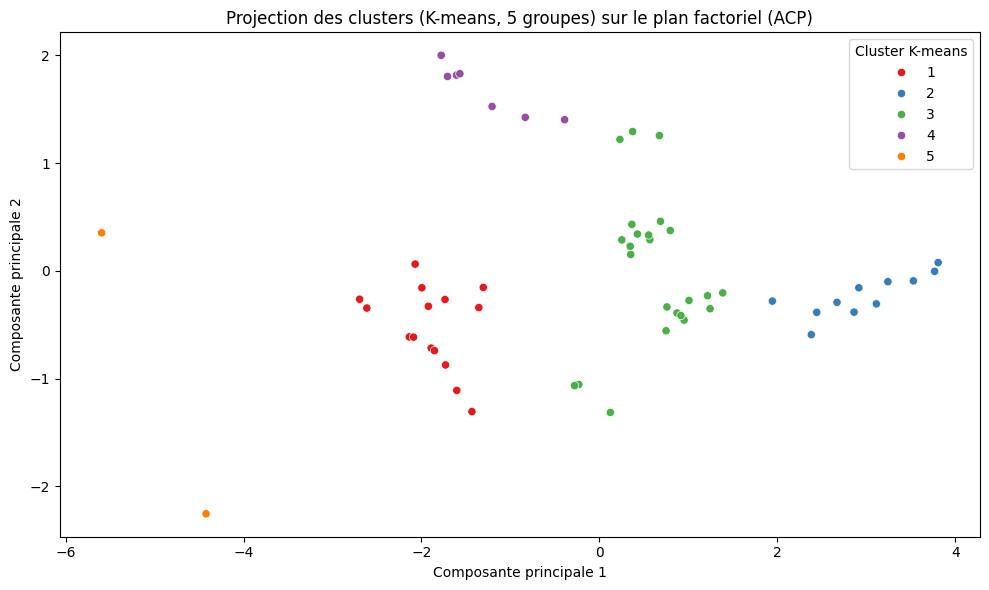

In [36]:
# ==============================
# 1. Import des librairies
# ==============================
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# 2. Chargement et préparation des données
# ==============================
df = pd.read_excel("cars_data1.xlsx")
df_quant = df.select_dtypes(include=['float64', 'int64']).copy()

# Standardisation des variables quantitatives
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_quant)

# ==============================
# 3. CAH (Ward)
# ==============================
linked = linkage(X_scaled, method='ward')

# ==============================
# 4. Découpage en clusters (CAH)
# ==============================
df_quant['Cluster_CAH'] = fcluster(linked, 5, criterion='maxclust')

# Moyennes par cluster
print("\nMoyennes par cluster (CAH) :")
print(df_quant.groupby('Cluster_CAH').mean(numeric_only=True))

# ==============================
# 5. Dendrogramme
# ==============================
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogramme de la CAH (quantitatives uniquement)")
plt.xlabel("Échantillons")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

# ==============================
# 6. K-Means (5 clusters)
# ==============================
kmeans = KMeans(n_clusters=5, random_state=42)
df_quant['Cluster_KMeans'] = kmeans.fit_predict(X_scaled) + 1  # +1 pour indexation 1..5

# Comparaison des clusters CAH et K-Means
ari = adjusted_rand_score(df_quant['Cluster_CAH'], df_quant['Cluster_KMeans'])
conf_mat = confusion_matrix(df_quant['Cluster_CAH'], df_quant['Cluster_KMeans'])
print(f"\nIndice de Rand ajusté (ARI) : {ari}")
print("Matrice de confusion :")
print(conf_mat)

# ==============================
# 7. ACP pour visualisation
# ==============================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisation des clusters K-Means dans le plan factoriel
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df_quant['Cluster_KMeans'],
    palette='Set1'
)
plt.title("Projection des clusters (K-means, 5 groupes) sur le plan factoriel (ACP)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Cluster K-means")
plt.tight_layout()
plt.show()
